In [41]:
# General Libs
# https://www.kaggle.com/code/mauriciofigueiredo/fruit-classification-with-a-simple-cnn/notebook
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
im_shape = (348,348)

TRAINING_DIR = '../dataset/train'
TEST_DIR = '../dataset/test'

seed = 10

BATCH_SIZE = 16

In [87]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [88]:
# If you want data augmentation, uncomment and run this cell
#data_generator = ImageDataGenerator(
#        validation_split=0.2,
#        rotation_range=20,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
#        rescale=1./255,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True,
#        fill_mode='nearest')

#val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [89]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validacion
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 324 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Classes: ['aguacate', 'kiwi', 'limon', 'naranja', 'piña']


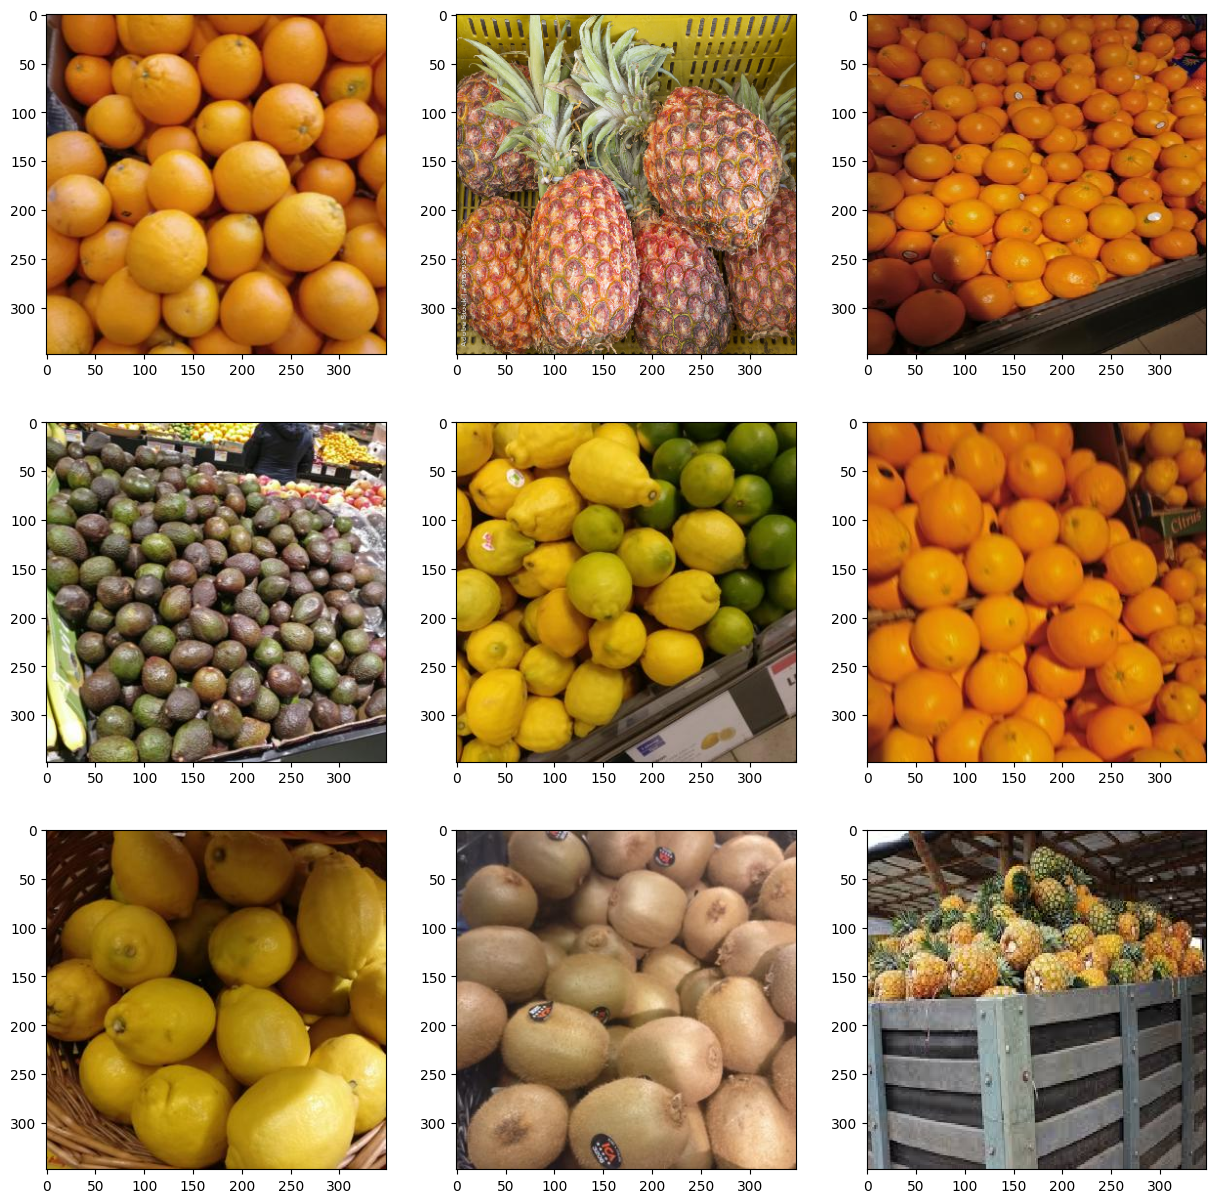

In [90]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [91]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'same',input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=6e-06),
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 174, 174, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 174, 174, 32)      9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 242208)            0         
                                                                 
 dense_17 (Dense)            (None, 5)               

In [93]:
epochs = 100

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='../model/model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.4490 - accuracy: 0.4448
Epoch 1: val_loss improved from inf to 1.45536, saving model to ../model\model.h5
20/20 [==============================] - 13s 649ms/step - loss: 1.4490 - accuracy: 0.4448 - val_loss: 1.4554 - val_accuracy: 0.4500
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.3818 - accuracy: 0.4513
Epoch 2: val_loss improved from 1.45536 to 1.40317, saving model to ../model\model.h5
20/20 [==============================] - 13s 646ms/step - loss: 1.3818 - accuracy: 0.4513 - val_loss: 1.4032 - val_accuracy: 0.5375
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 1.3161 - accuracy: 0.6461
Epoch 3: val_loss improved from 1.40317 to 1.35732, saving model to ../model\model.h5
20/20 [==============================] - 13s 642ms/step - loss: 1.3161 - accuracy: 0.6461 - val_loss: 1.3573 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - ETA: 0s - lo

20/20 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.8799
Epoch 27: val_loss improved from 0.88459 to 0.88173, saving model to ../model\model.h5
20/20 [==============================] - 13s 643ms/step - loss: 0.5529 - accuracy: 0.8799 - val_loss: 0.8817 - val_accuracy: 0.6875
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.8864
Epoch 28: val_loss improved from 0.88173 to 0.88055, saving model to ../model\model.h5
20/20 [==============================] - 13s 632ms/step - loss: 0.5485 - accuracy: 0.8864 - val_loss: 0.8805 - val_accuracy: 0.6750
Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.8896
Epoch 29: val_loss improved from 0.88055 to 0.85441, saving model to ../model\model.h5
20/20 [==============================] - 13s 663ms/step - loss: 0.5250 - accuracy: 0.8896 - val_loss: 0.8544 - val_accuracy: 0.7000
Epoch 30/100
20/20 [==============================] - ETA: 0s - loss

Epoch 54/100
20/20 [==============================] - ETA: 0s - loss: 0.2861 - accuracy: 0.9643
Epoch 54: val_loss did not improve from 0.71842
20/20 [==============================] - 14s 707ms/step - loss: 0.2861 - accuracy: 0.9643 - val_loss: 0.7211 - val_accuracy: 0.7375
Epoch 55/100
20/20 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.9643
Epoch 55: val_loss improved from 0.71842 to 0.71596, saving model to ../model\model.h5
20/20 [==============================] - 15s 768ms/step - loss: 0.2854 - accuracy: 0.9643 - val_loss: 0.7160 - val_accuracy: 0.7375
Epoch 56/100
20/20 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.9708
Epoch 56: val_loss improved from 0.71596 to 0.70990, saving model to ../model\model.h5
20/20 [==============================] - 14s 670ms/step - loss: 0.2699 - accuracy: 0.9708 - val_loss: 0.7099 - val_accuracy: 0.7625
Epoch 57/100
20/20 [==============================] - ETA: 0s - loss: 0.2644 - accuracy: 0.970

20/20 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9935
Epoch 82: val_loss did not improve from 0.65303
20/20 [==============================] - 13s 624ms/step - loss: 0.1537 - accuracy: 0.9935 - val_loss: 0.6559 - val_accuracy: 0.7625
Epoch 83/100
20/20 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9935
Epoch 83: val_loss improved from 0.65303 to 0.64306, saving model to ../model\model.h5
20/20 [==============================] - 13s 628ms/step - loss: 0.1495 - accuracy: 0.9935 - val_loss: 0.6431 - val_accuracy: 0.8000
Epoch 84/100
20/20 [==============================] - ETA: 0s - loss: 0.1473 - accuracy: 0.9968
Epoch 84: val_loss did not improve from 0.64306
20/20 [==============================] - 13s 666ms/step - loss: 0.1473 - accuracy: 0.9968 - val_loss: 0.6560 - val_accuracy: 0.7750
Epoch 85/100
20/20 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9968
Epoch 85: val_loss did not improve from 0.64306
20

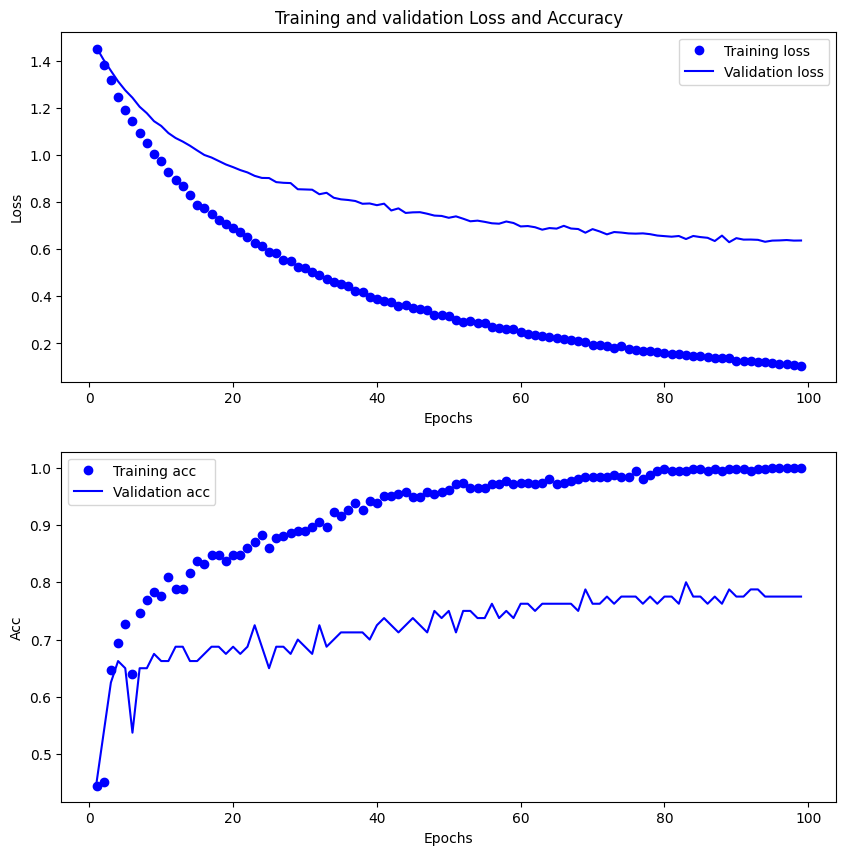

In [94]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [95]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('../model/model.h5')

In [96]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

5/5 [==============================] - 1s 150ms/step - loss: 0.6296 - accuracy: 0.7875
Val loss: 0.6296206712722778
Val accuracy: 0.7875000238418579


In [97]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 189ms/step - loss: 1.2185 - accuracy: 0.6000
Test loss: 1.218470811843872
Test accuracy: 0.6000000238418579


In [98]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

5/5 [==============================] - 1s 144ms/step
Classification Report
              precision    recall  f1-score   support

    aguacate       0.79      0.69      0.73        16
        kiwi       0.61      0.88      0.72        16
       limon       1.00      0.81      0.90        16
     naranja       0.93      0.81      0.87        16
        piña       0.75      0.75      0.75        16

    accuracy                           0.79        80
   macro avg       0.81      0.79      0.79        80
weighted avg       0.81      0.79      0.79        80



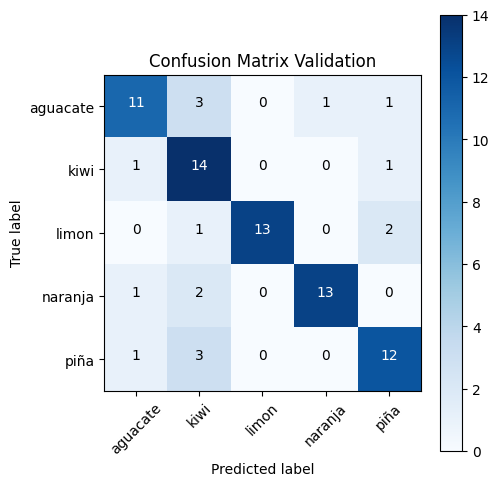

In [99]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix Validation')

#Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

4/4 [==============================] - 1s 144ms/step
Classification Report
              precision    recall  f1-score   support

    aguacate       0.14      0.10      0.12        10
        kiwi       0.80      0.40      0.53        10
       limon       0.78      0.70      0.74        10
     naranja       1.00      0.90      0.95        10
        piña       0.45      0.90      0.60        10

    accuracy                           0.60        50
   macro avg       0.63      0.60      0.59        50
weighted avg       0.63      0.60      0.59        50



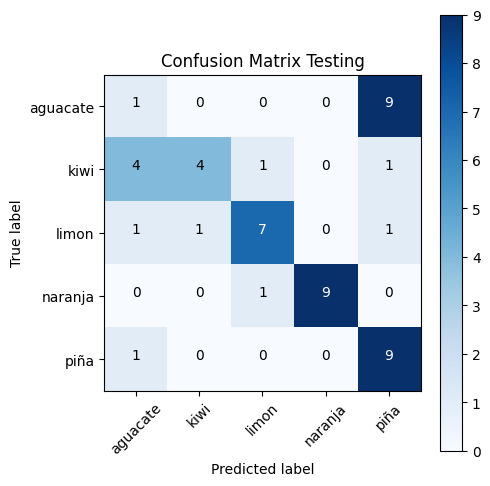

In [100]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix Testing')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))